In [1]:
import math
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi
from qiskit.providers.ibmq import *
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
sim = Aer.get_backend('statevector_simulator')

In [2]:
def inverse_qft(qc, n):
    for q in range(n//2):
        qc.swap(q, n-q-1)
    for q in range(n):
        for k in range(q+1,n):
            qc.cp(-math.pi/(2**(k-q)),k,q)
        qc.h(q)
        qc.barrier()
    

In [3]:
def qpe_e(n,theta):
    rn = list(range(n))
    qc=QuantumCircuit(n+1,n)
    qc.x(n)
    qc.h(rn)
    for i in rn:
        for j in range(2**i):
            qc.cp(theta,i,n)
    qc.barrier()
    inverse_qft(qc,n)
    qc.measure(rn,rn)
    return qc

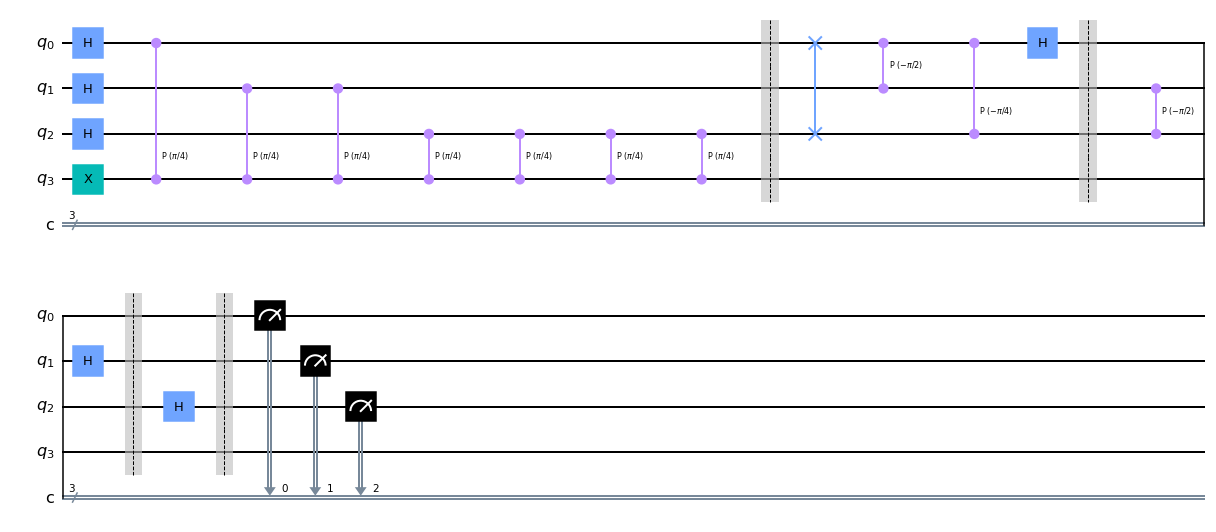

In [4]:
n=3
theta =  1/ 4
q=qpe_e(n,math.pi*theta)
cnt=execute(q,sim,shots=4096).result().get_counts() # Fine the state with most counts and put it in m
m=max(cnt, key= lambda x: cnt[x]) # Simulated QPE and its computation of theta
t1=int(m,2)/2**(n-1)
q.draw('mpl')

In [5]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True and x.name()!='ibmq_bogota'))
print("least busy backend: ", backend)

least busy backend:  ibmq_lima


In [6]:
job = execute(q, backend)
job_monitor(job)

Job Status: job has successfully run


In [7]:
m=max(job.result().get_counts(), key= lambda x: cnt[x])
t2=int(m,2)/2**(n-1)
print('Theta \n\n','Original ',theta,'\n Simulation ',t1,'\nReal Hardware : ',t2)

Theta 

 Original  0.25 
 Simulation  0.25 
Real Hardware :  0.25
